In [2]:
'''Today : 선형회귀 복습 부터 CNN 까지 최대한 공부하기'''

'Today : 선형회귀 복습 부터 CNN 까지 최대한 공부하기'

In [4]:
'''
1. 데이터에 대한 이해
2. 가설 수립
3. 손실 계산
4. 경사 하강법(Gradient Descent)'''

'\n1. 데이터에 대한 이해\n2. 가설 수립\n3. 손실 계산\n4. 경사 하강법(Gradient Descent)'

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
#훈련 데이터 셋의 구성
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [9]:
# 가중치와 편향을 고려한 Forward -> 식을 세우는 것,, 이것을 가설이라한다
# 비용함수 : 손실함수, 오차함수, 목적 함수 동치어로 W,b 를 찾기 위해 실제값과
# 이론 값을 비교하여 그 값을 수치화 한것
# Optimizer : 최적화 알고리즘으로 W와 b를 찾을 수 있게 도와주는 알고리즘
# u = u - a * du/dW(또는 db) 와 같고, 여기서 a가 학습률 이라고 하는 수치이다

In [13]:
print(x_train)
print(y_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [15]:
# W 와 b 의 초기화
W = torch.zeros(1, requires_grad = True)
print(W)
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [17]:
# 가설 세우기
hypothesis = x_train * W + b
print(hypothesis)
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)
tensor(18.6667, grad_fn=<MeanBackward0>)


In [18]:
 # 경사 하강법 구현하기
optimizer = optim.SGD([W, b], lr = 0.001)

optimizer.zero_grad()
cost.backward()
optimizer.step()

In [19]:
nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.037, b: 0.016 Cost: 18.256510
Epoch  100/2000 W: 1.146, b: 0.483 Cost: 2.027048
Epoch  200/2000 W: 1.515, b: 0.625 Cost: 0.280546
Epoch  300/2000 W: 1.641, b: 0.660 Cost: 0.089984
Epoch  400/2000 W: 1.687, b: 0.661 Cost: 0.066704
Epoch  500/2000 W: 1.706, b: 0.651 Cost: 0.061525
Epoch  600/2000 W: 1.717, b: 0.637 Cost: 0.058417
Epoch  700/2000 W: 1.725, b: 0.622 Cost: 0.055651
Epoch  800/2000 W: 1.732, b: 0.608 Cost: 0.053035
Epoch  900/2000 W: 1.739, b: 0.593 Cost: 0.050545
Epoch 1000/2000 W: 1.745, b: 0.579 Cost: 0.048172
Epoch 1100/2000 W: 1.751, b: 0.566 Cost: 0.045911
Epoch 1200/2000 W: 1.757, b: 0.552 Cost: 0.043756
Epoch 1300/2000 W: 1.763, b: 0.539 Cost: 0.041701
Epoch 1400/2000 W: 1.769, b: 0.526 Cost: 0.039744
Epoch 1500/2000 W: 1.774, b: 0.514 Cost: 0.037878
Epoch 1600/2000 W: 1.779, b: 0.502 Cost: 0.036100
Epoch 1700/2000 W: 1.785, b: 0.490 Cost: 0.034405
Epoch 1800/2000 W: 1.790, b: 0.478 Cost: 0.032790
Epoch 1900/2000 W: 1.795, b: 0.467 Cost: 0.031250

In [20]:
# optimizer.zero_grad() 가 필요한 이유
w = torch.tensor(2.0, requires_grad = True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    z = 2*w
    z.backward()
    print("수식을 w 로 미분 한 값 : {}".format(w.grad))
# 계속해서 w.grad 가 2가 누적되는 것을 몰 수 있다...따라서 초기화를 하기 위한 것이다

수식을 w 로 미분 한 값 : 2.0
수식을 w 로 미분 한 값 : 4.0
수식을 w 로 미분 한 값 : 6.0
수식을 w 로 미분 한 값 : 8.0
수식을 w 로 미분 한 값 : 10.0
수식을 w 로 미분 한 값 : 12.0
수식을 w 로 미분 한 값 : 14.0
수식을 w 로 미분 한 값 : 16.0
수식을 w 로 미분 한 값 : 18.0
수식을 w 로 미분 한 값 : 20.0
수식을 w 로 미분 한 값 : 22.0
수식을 w 로 미분 한 값 : 24.0
수식을 w 로 미분 한 값 : 26.0
수식을 w 로 미분 한 값 : 28.0
수식을 w 로 미분 한 값 : 30.0
수식을 w 로 미분 한 값 : 32.0
수식을 w 로 미분 한 값 : 34.0
수식을 w 로 미분 한 값 : 36.0
수식을 w 로 미분 한 값 : 38.0
수식을 w 로 미분 한 값 : 40.0
수식을 w 로 미분 한 값 : 42.0


In [21]:
# torch.manual_seed() 를 사용한다면 프로그램의 결과는 다른 컴터에서 해도 동일
# 난수 발생 값을 동일하게 보장해주는 특징이 있기 떄문이다
torch.manual_seed(3)
print("랜덤 시드가 3일때")
for i in range(1,3):
    print(torch.rand(1))

랜덤 시드가 3일때
tensor([0.0043])
tensor([0.1056])


In [22]:
torch.manual_seed(6)
print("랜덤 시드가 6 일때")
for i in range(1,3):
    print(torch.rand(1))

랜덤 시드가 6 일때
tensor([0.5722])
tensor([0.5539])


In [23]:
# 위와 동일한 결과가 나오는 것을 확인 할 수 있다
torch.manual_seed(3)
print("랜덤 시드가 3일때")
for i in range(1,3):
    print(torch.rand(1))

랜덤 시드가 3일때
tensor([0.0043])
tensor([0.1056])


In [24]:
# 경사하강법은 넘파이로만 직접 코딩하는 것은 굉장히 까다로워서 파이토치에는
# Autograd라는 함수가 지원된다
w = torch.tensor(2.0, requires_grad = True)
y = w**2
z = 2*y + 5
z.backward()
print("수식을 W로 미분한 값 : {}".format(w.grad))

수식을 W로 미분한 값 : 8.0


In [27]:
'''지금까지 위에서 진행한 사항은 Simple Linear Regression 
앞으로는 ultivariable Linear Regression 에 대해서 진행'''

'지금까지 위에서 진행한 사항은 Simple Linear Regression \n앞으로는 ultivariable Linear Regression 에 대해서 진행'

In [28]:
torch.manual_seed(1)# 동일한 random값을 불러오기 위함
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 4000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))


Epoch    0/4000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/4000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/4000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/4000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/4000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/4000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/4000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/4000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/4000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/4000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/4000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378
Epoch 1100/4000 w1: 0.722 w2: 0.608 w3: 0.680 b: 0.009 Cost: 1.038584
Epoch 1200/4000 w1: 0.727 w2: 0.603 w3: 0.681 b: 0.010 Cost: 0.999894
Epoch 1300/4000 w1: 0.731 w2: 0.599 w3: 0.681 b: 0.010 Cost: 0.963217
Epoch 1400/4000 

In [30]:
# 위에서는 항상 선형적으로 1차식을 이용했으나, 앞으로는 행렬로 진행

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W,b], lr = 1e-5)

nb_epochs = 200
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))
    print(W)


Epoch    0/200 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
tensor([[0.2940],
        [0.2936],
        [0.2974]], requires_grad=True)
Epoch    1/200 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
tensor([[0.4586],
        [0.4579],
        [0.4639]], requires_grad=True)
Epoch    2/200 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
tensor([[0.5508],
        [0.5499],
        [0.5571]], requires_grad=True)
Epoch    3/200 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
tensor([[0.6025],
        [0.6014],
        [0.6093]], requires_grad=True)
Epoch    4/200 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936005
tensor([[0.6314],
        [0.6302],
        [0.6385]], requires_grad=True)
Epoch    5/200 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
tensor([[0.6476],
        [0.6463],
   

Epoch   86/200 hypothesis: tensor([152.7751, 183.6944, 180.9609, 197.0643, 140.1280]) Cost: 1.573149
tensor([[0.6727],
        [0.6618],
        [0.6762]], requires_grad=True)
Epoch   87/200 hypothesis: tensor([152.7747, 183.6947, 180.9607, 197.0641, 140.1284]) Cost: 1.572457
tensor([[0.6728],
        [0.6618],
        [0.6762]], requires_grad=True)
Epoch   88/200 hypothesis: tensor([152.7742, 183.6949, 180.9606, 197.0640, 140.1288]) Cost: 1.571791
tensor([[0.6728],
        [0.6617],
        [0.6762]], requires_grad=True)
Epoch   89/200 hypothesis: tensor([152.7738, 183.6952, 180.9605, 197.0639, 140.1292]) Cost: 1.571114
tensor([[0.6729],
        [0.6616],
        [0.6762]], requires_grad=True)
Epoch   90/200 hypothesis: tensor([152.7734, 183.6955, 180.9603, 197.0638, 140.1296]) Cost: 1.570435
tensor([[0.6730],
        [0.6616],
        [0.6762]], requires_grad=True)
Epoch   91/200 hypothesis: tensor([152.7729, 183.6958, 180.9602, 197.0637, 140.1300]) Cost: 1.569754
tensor([[0.6730],
 

Epoch  176/200 hypothesis: tensor([152.7372, 183.7205, 180.9495, 197.0543, 140.1637]) Cost: 1.513120
tensor([[0.6777],
        [0.6564],
        [0.6767]], requires_grad=True)
Epoch  177/200 hypothesis: tensor([152.7368, 183.7208, 180.9494, 197.0542, 140.1641]) Cost: 1.512470
tensor([[0.6777],
        [0.6563],
        [0.6767]], requires_grad=True)
Epoch  178/200 hypothesis: tensor([152.7364, 183.7211, 180.9492, 197.0541, 140.1645]) Cost: 1.511838
tensor([[0.6778],
        [0.6563],
        [0.6767]], requires_grad=True)
Epoch  179/200 hypothesis: tensor([152.7360, 183.7213, 180.9491, 197.0540, 140.1649]) Cost: 1.511171
tensor([[0.6778],
        [0.6562],
        [0.6767]], requires_grad=True)
Epoch  180/200 hypothesis: tensor([152.7356, 183.7216, 180.9490, 197.0538, 140.1653]) Cost: 1.510532
tensor([[0.6779],
        [0.6561],
        [0.6767]], requires_grad=True)
Epoch  181/200 hypothesis: tensor([152.7352, 183.7219, 180.9488, 197.0537, 140.1657]) Cost: 1.509866
tensor([[0.6779],
 

In [31]:
# nn.Module 을 이용해서 선형 회귀를 진행할 수 있다

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [32]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)
nb_epochs = 10000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/10000 Cost: 31667.599609
Epoch  100/10000 Cost: 0.225993
Epoch  200/10000 Cost: 0.223911
Epoch  300/10000 Cost: 0.221941
Epoch  400/10000 Cost: 0.220059
Epoch  500/10000 Cost: 0.218271
Epoch  600/10000 Cost: 0.216575
Epoch  700/10000 Cost: 0.214950
Epoch  800/10000 Cost: 0.213413
Epoch  900/10000 Cost: 0.211952
Epoch 1000/10000 Cost: 0.210559
Epoch 1100/10000 Cost: 0.209230
Epoch 1200/10000 Cost: 0.207967
Epoch 1300/10000 Cost: 0.206762
Epoch 1400/10000 Cost: 0.205618
Epoch 1500/10000 Cost: 0.204529
Epoch 1600/10000 Cost: 0.203481
Epoch 1700/10000 Cost: 0.202486
Epoch 1800/10000 Cost: 0.201539
Epoch 1900/10000 Cost: 0.200634
Epoch 2000/10000 Cost: 0.199770
Epoch 2100/10000 Cost: 0.198943
Epoch 2200/10000 Cost: 0.198161
Epoch 2300/10000 Cost: 0.197408
Epoch 2400/10000 Cost: 0.196690
Epoch 2500/10000 Cost: 0.196002
Epoch 2600/10000 Cost: 0.195341
Epoch 2700/10000 Cost: 0.194713
Epoch 2800/10000 Cost: 0.194112
Epoch 2900/10000 Cost: 0.193538
Epoch 3000/10000 Cost: 0.192987
Epoc

In [35]:
new_var = torch.FloatTensor([[73,80,75]])
pred_y = model(new_var)
print(pred_y)
print(list(model.parameters()))

tensor([[151.4025]], grad_fn=<AddmmBackward>)
[Parameter containing:
tensor([[0.9751, 0.4822, 0.5515]], requires_grad=True), Parameter containing:
tensor([0.2848], requires_grad=True)]


In [37]:
# Class 로 파이토치 모델 구현하기



class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1) #(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x) # x 를 대입한 hypothesis 식을 의미
    

In [42]:
torch.manual_seed(1)
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)
    
    
    
model = MultivariateLinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770


In [43]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


In [44]:
# 미니배치와 배치크기 
# 배치 경사하강법과 미니배치 경사하강법

from torch.utils.data import TensorDataset # 텐서 데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [45]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [46]:
dataset = TensorDataset(x_train,y_train)

In [47]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [49]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

nb_epochs = 3000
for epoch in range(nb_epochs + 1):
   
   for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/3000 Batch 1/3 Cost: 37210.574219
Epoch    0/3000 Batch 2/3 Cost: 16463.394531
Epoch    0/3000 Batch 3/3 Cost: 2130.967041
Epoch    1/3000 Batch 1/3 Cost: 1196.247559
Epoch    1/3000 Batch 2/3 Cost: 607.885742
Epoch    1/3000 Batch 3/3 Cost: 302.890442
Epoch    2/3000 Batch 1/3 Cost: 45.500126
Epoch    2/3000 Batch 2/3 Cost: 19.989773
Epoch    2/3000 Batch 3/3 Cost: 0.266310
Epoch    3/3000 Batch 1/3 Cost: 3.424530
Epoch    3/3000 Batch 2/3 Cost: 38.331135
Epoch    3/3000 Batch 3/3 Cost: 5.501392
Epoch    4/3000 Batch 1/3 Cost: 1.433258
Epoch    4/3000 Batch 2/3 Cost: 28.980293
Epoch    4/3000 Batch 3/3 Cost: 23.308434
Epoch    5/3000 Batch 1/3 Cost: 10.520461
Epoch    5/3000 Batch 2/3 Cost: 13.878901
Epoch    5/3000 Batch 3/3 Cost: 18.593971
Epoch    6/3000 Batch 1/3 Cost: 29.622532
Epoch    6/3000 Batch 2/3 Cost: 8.460442
Epoch    6/3000 Batch 3/3 Cost: 12.447860
Epoch    7/3000 Batch 1/3 Cost: 15.158208
Epoch    7/3000 Batch 2/3 Cost: 15.029005
Epoch    7/3000 Batch 3/3 C

Epoch   91/3000 Batch 1/3 Cost: 15.159271
Epoch   91/3000 Batch 2/3 Cost: 7.924596
Epoch   91/3000 Batch 3/3 Cost: 20.059973
Epoch   92/3000 Batch 1/3 Cost: 7.403406
Epoch   92/3000 Batch 2/3 Cost: 11.589134
Epoch   92/3000 Batch 3/3 Cost: 20.564459
Epoch   93/3000 Batch 1/3 Cost: 4.889661
Epoch   93/3000 Batch 2/3 Cost: 28.898712
Epoch   93/3000 Batch 3/3 Cost: 6.687941
Epoch   94/3000 Batch 1/3 Cost: 20.737000
Epoch   94/3000 Batch 2/3 Cost: 9.673363
Epoch   94/3000 Batch 3/3 Cost: 11.030758
Epoch   95/3000 Batch 1/3 Cost: 17.153412
Epoch   95/3000 Batch 2/3 Cost: 12.289036
Epoch   95/3000 Batch 3/3 Cost: 2.331288
Epoch   96/3000 Batch 1/3 Cost: 3.780218
Epoch   96/3000 Batch 2/3 Cost: 13.014520
Epoch   96/3000 Batch 3/3 Cost: 24.618622
Epoch   97/3000 Batch 1/3 Cost: 8.012173
Epoch   97/3000 Batch 2/3 Cost: 19.094250
Epoch   97/3000 Batch 3/3 Cost: 14.360927
Epoch   98/3000 Batch 1/3 Cost: 18.492163
Epoch   98/3000 Batch 2/3 Cost: 8.677810
Epoch   98/3000 Batch 3/3 Cost: 2.964181
Ep

Epoch  174/3000 Batch 2/3 Cost: 14.860329
Epoch  174/3000 Batch 3/3 Cost: 12.901443
Epoch  175/3000 Batch 1/3 Cost: 14.991823
Epoch  175/3000 Batch 2/3 Cost: 6.155319
Epoch  175/3000 Batch 3/3 Cost: 5.850337
Epoch  176/3000 Batch 1/3 Cost: 11.407621
Epoch  176/3000 Batch 2/3 Cost: 7.638975
Epoch  176/3000 Batch 3/3 Cost: 17.236763
Epoch  177/3000 Batch 1/3 Cost: 12.480381
Epoch  177/3000 Batch 2/3 Cost: 11.840397
Epoch  177/3000 Batch 3/3 Cost: 9.248519
Epoch  178/3000 Batch 1/3 Cost: 5.937934
Epoch  178/3000 Batch 2/3 Cost: 18.541557
Epoch  178/3000 Batch 3/3 Cost: 12.491720
Epoch  179/3000 Batch 1/3 Cost: 9.107117
Epoch  179/3000 Batch 2/3 Cost: 5.879174
Epoch  179/3000 Batch 3/3 Cost: 27.549204
Epoch  180/3000 Batch 1/3 Cost: 5.929445
Epoch  180/3000 Batch 2/3 Cost: 9.832296
Epoch  180/3000 Batch 3/3 Cost: 23.233206
Epoch  181/3000 Batch 1/3 Cost: 5.701145
Epoch  181/3000 Batch 2/3 Cost: 14.501852
Epoch  181/3000 Batch 3/3 Cost: 6.578533
Epoch  182/3000 Batch 1/3 Cost: 7.344707
Epoc

Epoch  256/3000 Batch 3/3 Cost: 10.133715
Epoch  257/3000 Batch 1/3 Cost: 0.228637
Epoch  257/3000 Batch 2/3 Cost: 21.897900
Epoch  257/3000 Batch 3/3 Cost: 12.689449
Epoch  258/3000 Batch 1/3 Cost: 11.131382
Epoch  258/3000 Batch 2/3 Cost: 5.610507
Epoch  258/3000 Batch 3/3 Cost: 10.362513
Epoch  259/3000 Batch 1/3 Cost: 2.338490
Epoch  259/3000 Batch 2/3 Cost: 24.162045
Epoch  259/3000 Batch 3/3 Cost: 4.889257
Epoch  260/3000 Batch 1/3 Cost: 6.774529
Epoch  260/3000 Batch 2/3 Cost: 5.824285
Epoch  260/3000 Batch 3/3 Cost: 23.486607
Epoch  261/3000 Batch 1/3 Cost: 12.483681
Epoch  261/3000 Batch 2/3 Cost: 5.301033
Epoch  261/3000 Batch 3/3 Cost: 4.576529
Epoch  262/3000 Batch 1/3 Cost: 6.300339
Epoch  262/3000 Batch 2/3 Cost: 9.217547
Epoch  262/3000 Batch 3/3 Cost: 11.081393
Epoch  263/3000 Batch 1/3 Cost: 0.380091
Epoch  263/3000 Batch 2/3 Cost: 10.509242
Epoch  263/3000 Batch 3/3 Cost: 20.300844
Epoch  264/3000 Batch 1/3 Cost: 9.123485
Epoch  264/3000 Batch 2/3 Cost: 8.970989
Epoch

Epoch  343/3000 Batch 2/3 Cost: 5.088149
Epoch  343/3000 Batch 3/3 Cost: 11.053981
Epoch  344/3000 Batch 1/3 Cost: 9.500260
Epoch  344/3000 Batch 2/3 Cost: 7.357214
Epoch  344/3000 Batch 3/3 Cost: 2.867104
Epoch  345/3000 Batch 1/3 Cost: 0.479685
Epoch  345/3000 Batch 2/3 Cost: 18.472446
Epoch  345/3000 Batch 3/3 Cost: 10.758693
Epoch  346/3000 Batch 1/3 Cost: 6.092757
Epoch  346/3000 Batch 2/3 Cost: 4.506522
Epoch  346/3000 Batch 3/3 Cost: 20.344316
Epoch  347/3000 Batch 1/3 Cost: 8.013693
Epoch  347/3000 Batch 2/3 Cost: 5.644629
Epoch  347/3000 Batch 3/3 Cost: 14.080931
Epoch  348/3000 Batch 1/3 Cost: 5.753908
Epoch  348/3000 Batch 2/3 Cost: 10.700714
Epoch  348/3000 Batch 3/3 Cost: 5.031238
Epoch  349/3000 Batch 1/3 Cost: 12.605962
Epoch  349/3000 Batch 2/3 Cost: 10.961990
Epoch  349/3000 Batch 3/3 Cost: 1.280500
Epoch  350/3000 Batch 1/3 Cost: 10.076667
Epoch  350/3000 Batch 2/3 Cost: 4.156544
Epoch  350/3000 Batch 3/3 Cost: 14.331913
Epoch  351/3000 Batch 1/3 Cost: 8.185121
Epoch 

Epoch  451/3000 Batch 1/3 Cost: 2.921063
Epoch  451/3000 Batch 2/3 Cost: 9.320031
Epoch  451/3000 Batch 3/3 Cost: 7.945300
Epoch  452/3000 Batch 1/3 Cost: 6.502813
Epoch  452/3000 Batch 2/3 Cost: 4.429482
Epoch  452/3000 Batch 3/3 Cost: 8.637693
Epoch  453/3000 Batch 1/3 Cost: 4.953886
Epoch  453/3000 Batch 2/3 Cost: 7.193456
Epoch  453/3000 Batch 3/3 Cost: 6.727460
Epoch  454/3000 Batch 1/3 Cost: 8.616418
Epoch  454/3000 Batch 2/3 Cost: 3.107083
Epoch  454/3000 Batch 3/3 Cost: 11.791976
Epoch  455/3000 Batch 1/3 Cost: 4.977379
Epoch  455/3000 Batch 2/3 Cost: 11.198633
Epoch  455/3000 Batch 3/3 Cost: 10.536827
Epoch  456/3000 Batch 1/3 Cost: 2.820922
Epoch  456/3000 Batch 2/3 Cost: 6.158792
Epoch  456/3000 Batch 3/3 Cost: 13.400430
Epoch  457/3000 Batch 1/3 Cost: 8.875563
Epoch  457/3000 Batch 2/3 Cost: 4.359625
Epoch  457/3000 Batch 3/3 Cost: 4.040998
Epoch  458/3000 Batch 1/3 Cost: 4.610549
Epoch  458/3000 Batch 2/3 Cost: 8.759968
Epoch  458/3000 Batch 3/3 Cost: 2.470580
Epoch  459/3

Epoch  552/3000 Batch 2/3 Cost: 3.723528
Epoch  552/3000 Batch 3/3 Cost: 6.495592
Epoch  553/3000 Batch 1/3 Cost: 10.592018
Epoch  553/3000 Batch 2/3 Cost: 6.826656
Epoch  553/3000 Batch 3/3 Cost: 0.875362
Epoch  554/3000 Batch 1/3 Cost: 1.126451
Epoch  554/3000 Batch 2/3 Cost: 14.897485
Epoch  554/3000 Batch 3/3 Cost: 3.688444
Epoch  555/3000 Batch 1/3 Cost: 4.398437
Epoch  555/3000 Batch 2/3 Cost: 7.425496
Epoch  555/3000 Batch 3/3 Cost: 2.571703
Epoch  556/3000 Batch 1/3 Cost: 1.365847
Epoch  556/3000 Batch 2/3 Cost: 14.695379
Epoch  556/3000 Batch 3/3 Cost: 3.019500
Epoch  557/3000 Batch 1/3 Cost: 2.071863
Epoch  557/3000 Batch 2/3 Cost: 8.072772
Epoch  557/3000 Batch 3/3 Cost: 6.898478
Epoch  558/3000 Batch 1/3 Cost: 6.151308
Epoch  558/3000 Batch 2/3 Cost: 3.244406
Epoch  558/3000 Batch 3/3 Cost: 6.938774
Epoch  559/3000 Batch 1/3 Cost: 4.089499
Epoch  559/3000 Batch 2/3 Cost: 6.172652
Epoch  559/3000 Batch 3/3 Cost: 5.252389
Epoch  560/3000 Batch 1/3 Cost: 0.398641
Epoch  560/30

Epoch  626/3000 Batch 2/3 Cost: 5.601005
Epoch  626/3000 Batch 3/3 Cost: 11.436091
Epoch  627/3000 Batch 1/3 Cost: 5.027736
Epoch  627/3000 Batch 2/3 Cost: 5.894390
Epoch  627/3000 Batch 3/3 Cost: 6.279102
Epoch  628/3000 Batch 1/3 Cost: 5.034692
Epoch  628/3000 Batch 2/3 Cost: 4.284194
Epoch  628/3000 Batch 3/3 Cost: 4.275775
Epoch  629/3000 Batch 1/3 Cost: 1.420064
Epoch  629/3000 Batch 2/3 Cost: 7.266730
Epoch  629/3000 Batch 3/3 Cost: 6.313715
Epoch  630/3000 Batch 1/3 Cost: 5.801257
Epoch  630/3000 Batch 2/3 Cost: 5.772072
Epoch  630/3000 Batch 3/3 Cost: 4.205203
Epoch  631/3000 Batch 1/3 Cost: 3.279060
Epoch  631/3000 Batch 2/3 Cost: 5.502671
Epoch  631/3000 Batch 3/3 Cost: 6.052009
Epoch  632/3000 Batch 1/3 Cost: 5.998171
Epoch  632/3000 Batch 2/3 Cost: 2.572883
Epoch  632/3000 Batch 3/3 Cost: 8.144815
Epoch  633/3000 Batch 1/3 Cost: 5.046298
Epoch  633/3000 Batch 2/3 Cost: 8.206070
Epoch  633/3000 Batch 3/3 Cost: 5.848270
Epoch  634/3000 Batch 1/3 Cost: 3.513752
Epoch  634/3000

Epoch  710/3000 Batch 3/3 Cost: 3.491862
Epoch  711/3000 Batch 1/3 Cost: 5.673861
Epoch  711/3000 Batch 2/3 Cost: 3.596557
Epoch  711/3000 Batch 3/3 Cost: 2.080908
Epoch  712/3000 Batch 1/3 Cost: 3.863187
Epoch  712/3000 Batch 2/3 Cost: 4.976567
Epoch  712/3000 Batch 3/3 Cost: 3.383958
Epoch  713/3000 Batch 1/3 Cost: 3.637522
Epoch  713/3000 Batch 2/3 Cost: 2.112070
Epoch  713/3000 Batch 3/3 Cost: 11.860928
Epoch  714/3000 Batch 1/3 Cost: 4.433713
Epoch  714/3000 Batch 2/3 Cost: 3.442539
Epoch  714/3000 Batch 3/3 Cost: 3.507276
Epoch  715/3000 Batch 1/3 Cost: 0.533311
Epoch  715/3000 Batch 2/3 Cost: 6.711401
Epoch  715/3000 Batch 3/3 Cost: 5.938878
Epoch  716/3000 Batch 1/3 Cost: 2.658109
Epoch  716/3000 Batch 2/3 Cost: 4.501513
Epoch  716/3000 Batch 3/3 Cost: 9.869564
Epoch  717/3000 Batch 1/3 Cost: 2.666649
Epoch  717/3000 Batch 2/3 Cost: 4.527337
Epoch  717/3000 Batch 3/3 Cost: 9.828765
Epoch  718/3000 Batch 1/3 Cost: 4.430163
Epoch  718/3000 Batch 2/3 Cost: 3.690852
Epoch  718/3000

Epoch  794/3000 Batch 2/3 Cost: 5.658237
Epoch  794/3000 Batch 3/3 Cost: 4.920144
Epoch  795/3000 Batch 1/3 Cost: 2.400210
Epoch  795/3000 Batch 2/3 Cost: 3.937954
Epoch  795/3000 Batch 3/3 Cost: 8.692312
Epoch  796/3000 Batch 1/3 Cost: 4.467435
Epoch  796/3000 Batch 2/3 Cost: 2.882991
Epoch  796/3000 Batch 3/3 Cost: 2.595788
Epoch  797/3000 Batch 1/3 Cost: 2.869473
Epoch  797/3000 Batch 2/3 Cost: 4.760801
Epoch  797/3000 Batch 3/3 Cost: 1.686558
Epoch  798/3000 Batch 1/3 Cost: 2.966681
Epoch  798/3000 Batch 2/3 Cost: 1.921048
Epoch  798/3000 Batch 3/3 Cost: 10.237929
Epoch  799/3000 Batch 1/3 Cost: 2.844773
Epoch  799/3000 Batch 2/3 Cost: 2.859273
Epoch  799/3000 Batch 3/3 Cost: 8.910501
Epoch  800/3000 Batch 1/3 Cost: 2.348843
Epoch  800/3000 Batch 2/3 Cost: 4.335260
Epoch  800/3000 Batch 3/3 Cost: 3.679716
Epoch  801/3000 Batch 1/3 Cost: 2.739891
Epoch  801/3000 Batch 2/3 Cost: 2.092585
Epoch  801/3000 Batch 3/3 Cost: 10.003954
Epoch  802/3000 Batch 1/3 Cost: 2.831906
Epoch  802/300

Epoch  879/3000 Batch 2/3 Cost: 3.512436
Epoch  879/3000 Batch 3/3 Cost: 3.145676
Epoch  880/3000 Batch 1/3 Cost: 0.852390
Epoch  880/3000 Batch 2/3 Cost: 4.987786
Epoch  880/3000 Batch 3/3 Cost: 4.233600
Epoch  881/3000 Batch 1/3 Cost: 3.560334
Epoch  881/3000 Batch 2/3 Cost: 2.420788
Epoch  881/3000 Batch 3/3 Cost: 6.140317
Epoch  882/3000 Batch 1/3 Cost: 4.481740
Epoch  882/3000 Batch 2/3 Cost: 3.940393
Epoch  882/3000 Batch 3/3 Cost: 2.571165
Epoch  883/3000 Batch 1/3 Cost: 4.959494
Epoch  883/3000 Batch 2/3 Cost: 3.820848
Epoch  883/3000 Batch 3/3 Cost: 2.588222
Epoch  884/3000 Batch 1/3 Cost: 4.652079
Epoch  884/3000 Batch 2/3 Cost: 5.283326
Epoch  884/3000 Batch 3/3 Cost: 4.153545
Epoch  885/3000 Batch 1/3 Cost: 2.356269
Epoch  885/3000 Batch 2/3 Cost: 3.985816
Epoch  885/3000 Batch 3/3 Cost: 1.748669
Epoch  886/3000 Batch 1/3 Cost: 0.751711
Epoch  886/3000 Batch 2/3 Cost: 3.296856
Epoch  886/3000 Batch 3/3 Cost: 7.293527
Epoch  887/3000 Batch 1/3 Cost: 3.809392
Epoch  887/3000 

Epoch  960/3000 Batch 2/3 Cost: 2.212451
Epoch  960/3000 Batch 3/3 Cost: 1.484385
Epoch  961/3000 Batch 1/3 Cost: 3.923675
Epoch  961/3000 Batch 2/3 Cost: 2.176451
Epoch  961/3000 Batch 3/3 Cost: 1.530357
Epoch  962/3000 Batch 1/3 Cost: 6.018177
Epoch  962/3000 Batch 2/3 Cost: 2.983066
Epoch  962/3000 Batch 3/3 Cost: 0.892520
Epoch  963/3000 Batch 1/3 Cost: 0.166014
Epoch  963/3000 Batch 2/3 Cost: 7.997151
Epoch  963/3000 Batch 3/3 Cost: 2.143711
Epoch  964/3000 Batch 1/3 Cost: 5.257563
Epoch  964/3000 Batch 2/3 Cost: 3.503631
Epoch  964/3000 Batch 3/3 Cost: 0.667691
Epoch  965/3000 Batch 1/3 Cost: 0.251119
Epoch  965/3000 Batch 2/3 Cost: 7.765265
Epoch  965/3000 Batch 3/3 Cost: 2.193957
Epoch  966/3000 Batch 1/3 Cost: 2.292625
Epoch  966/3000 Batch 2/3 Cost: 1.152737
Epoch  966/3000 Batch 3/3 Cost: 7.640750
Epoch  967/3000 Batch 1/3 Cost: 2.526111
Epoch  967/3000 Batch 2/3 Cost: 2.217708
Epoch  967/3000 Batch 3/3 Cost: 5.588561
Epoch  968/3000 Batch 1/3 Cost: 4.276964
Epoch  968/3000 

Epoch 1044/3000 Batch 2/3 Cost: 2.650302
Epoch 1044/3000 Batch 3/3 Cost: 5.898044
Epoch 1045/3000 Batch 1/3 Cost: 2.792099
Epoch 1045/3000 Batch 2/3 Cost: 1.735804
Epoch 1045/3000 Batch 3/3 Cost: 2.927412
Epoch 1046/3000 Batch 1/3 Cost: 3.439656
Epoch 1046/3000 Batch 2/3 Cost: 1.949347
Epoch 1046/3000 Batch 3/3 Cost: 1.175585
Epoch 1047/3000 Batch 1/3 Cost: 3.527781
Epoch 1047/3000 Batch 2/3 Cost: 1.870062
Epoch 1047/3000 Batch 3/3 Cost: 1.149230
Epoch 1048/3000 Batch 1/3 Cost: 5.260255
Epoch 1048/3000 Batch 2/3 Cost: 2.733206
Epoch 1048/3000 Batch 3/3 Cost: 0.548987
Epoch 1049/3000 Batch 1/3 Cost: 3.772247
Epoch 1049/3000 Batch 2/3 Cost: 1.849426
Epoch 1049/3000 Batch 3/3 Cost: 1.523795
Epoch 1050/3000 Batch 1/3 Cost: 2.429297
Epoch 1050/3000 Batch 2/3 Cost: 0.925837
Epoch 1050/3000 Batch 3/3 Cost: 7.320833
Epoch 1051/3000 Batch 1/3 Cost: 2.783953
Epoch 1051/3000 Batch 2/3 Cost: 2.353910
Epoch 1051/3000 Batch 3/3 Cost: 3.444746
Epoch 1052/3000 Batch 1/3 Cost: 1.657015
Epoch 1052/3000 

Epoch 1141/3000 Batch 2/3 Cost: 1.769790
Epoch 1141/3000 Batch 3/3 Cost: 2.593969
Epoch 1142/3000 Batch 1/3 Cost: 2.284581
Epoch 1142/3000 Batch 2/3 Cost: 3.363241
Epoch 1142/3000 Batch 3/3 Cost: 3.772140
Epoch 1143/3000 Batch 1/3 Cost: 4.238225
Epoch 1143/3000 Batch 2/3 Cost: 2.088631
Epoch 1143/3000 Batch 3/3 Cost: 1.129101
Epoch 1144/3000 Batch 1/3 Cost: 0.143659
Epoch 1144/3000 Batch 2/3 Cost: 2.654375
Epoch 1144/3000 Batch 3/3 Cost: 5.405043
Epoch 1145/3000 Batch 1/3 Cost: 1.507295
Epoch 1145/3000 Batch 2/3 Cost: 2.839362
Epoch 1145/3000 Batch 3/3 Cost: 1.381672
Epoch 1146/3000 Batch 1/3 Cost: 0.778240
Epoch 1146/3000 Batch 2/3 Cost: 2.201590
Epoch 1146/3000 Batch 3/3 Cost: 4.928677
Epoch 1147/3000 Batch 1/3 Cost: 2.325398
Epoch 1147/3000 Batch 2/3 Cost: 3.295631
Epoch 1147/3000 Batch 3/3 Cost: 3.787447
Epoch 1148/3000 Batch 1/3 Cost: 2.872395
Epoch 1148/3000 Batch 2/3 Cost: 1.459055
Epoch 1148/3000 Batch 3/3 Cost: 1.756224
Epoch 1149/3000 Batch 1/3 Cost: 2.060605
Epoch 1149/3000 

Epoch 1226/3000 Batch 1/3 Cost: 0.465026
Epoch 1226/3000 Batch 2/3 Cost: 5.176115
Epoch 1226/3000 Batch 3/3 Cost: 1.087084
Epoch 1227/3000 Batch 1/3 Cost: 2.434615
Epoch 1227/3000 Batch 2/3 Cost: 1.186333
Epoch 1227/3000 Batch 3/3 Cost: 1.848730
Epoch 1228/3000 Batch 1/3 Cost: 1.914904
Epoch 1228/3000 Batch 2/3 Cost: 2.490793
Epoch 1228/3000 Batch 3/3 Cost: 0.658967
Epoch 1229/3000 Batch 1/3 Cost: 0.496826
Epoch 1229/3000 Batch 2/3 Cost: 2.079310
Epoch 1229/3000 Batch 3/3 Cost: 4.509142
Epoch 1230/3000 Batch 1/3 Cost: 2.696860
Epoch 1230/3000 Batch 2/3 Cost: 1.302861
Epoch 1230/3000 Batch 3/3 Cost: 1.112108
Epoch 1231/3000 Batch 1/3 Cost: 1.391463
Epoch 1231/3000 Batch 2/3 Cost: 2.181165
Epoch 1231/3000 Batch 3/3 Cost: 1.943483
Epoch 1232/3000 Batch 1/3 Cost: 1.781835
Epoch 1232/3000 Batch 2/3 Cost: 2.594162
Epoch 1232/3000 Batch 3/3 Cost: 0.831860
Epoch 1233/3000 Batch 1/3 Cost: 1.694389
Epoch 1233/3000 Batch 2/3 Cost: 2.376512
Epoch 1233/3000 Batch 3/3 Cost: 1.525528
Epoch 1234/3000 

Epoch 1307/3000 Batch 2/3 Cost: 2.712424
Epoch 1307/3000 Batch 3/3 Cost: 2.254717
Epoch 1308/3000 Batch 1/3 Cost: 0.909743
Epoch 1308/3000 Batch 2/3 Cost: 2.419789
Epoch 1308/3000 Batch 3/3 Cost: 1.447657
Epoch 1309/3000 Batch 1/3 Cost: 2.305296
Epoch 1309/3000 Batch 2/3 Cost: 1.423538
Epoch 1309/3000 Batch 3/3 Cost: 0.478296
Epoch 1310/3000 Batch 1/3 Cost: 0.427364
Epoch 1310/3000 Batch 2/3 Cost: 2.693275
Epoch 1310/3000 Batch 3/3 Cost: 2.234737
Epoch 1311/3000 Batch 1/3 Cost: 1.669827
Epoch 1311/3000 Batch 2/3 Cost: 1.054568
Epoch 1311/3000 Batch 3/3 Cost: 4.027758
Epoch 1312/3000 Batch 1/3 Cost: 2.035710
Epoch 1312/3000 Batch 2/3 Cost: 1.892396
Epoch 1312/3000 Batch 3/3 Cost: 2.100323
Epoch 1313/3000 Batch 1/3 Cost: 2.068964
Epoch 1313/3000 Batch 2/3 Cost: 2.187700
Epoch 1313/3000 Batch 3/3 Cost: 1.488999
Epoch 1314/3000 Batch 1/3 Cost: 2.070106
Epoch 1314/3000 Batch 2/3 Cost: 0.898684
Epoch 1314/3000 Batch 3/3 Cost: 2.644445
Epoch 1315/3000 Batch 1/3 Cost: 1.490909
Epoch 1315/3000 

Epoch 1390/3000 Batch 3/3 Cost: 2.908228
Epoch 1391/3000 Batch 1/3 Cost: 1.073364
Epoch 1391/3000 Batch 2/3 Cost: 1.521412
Epoch 1391/3000 Batch 3/3 Cost: 2.258935
Epoch 1392/3000 Batch 1/3 Cost: 1.498821
Epoch 1392/3000 Batch 2/3 Cost: 0.318154
Epoch 1392/3000 Batch 3/3 Cost: 4.339366
Epoch 1393/3000 Batch 1/3 Cost: 0.735142
Epoch 1393/3000 Batch 2/3 Cost: 1.815042
Epoch 1393/3000 Batch 3/3 Cost: 2.148048
Epoch 1394/3000 Batch 1/3 Cost: 1.340750
Epoch 1394/3000 Batch 2/3 Cost: 2.125705
Epoch 1394/3000 Batch 3/3 Cost: 0.731957
Epoch 1395/3000 Batch 1/3 Cost: 0.226413
Epoch 1395/3000 Batch 2/3 Cost: 2.513674
Epoch 1395/3000 Batch 3/3 Cost: 2.124808
Epoch 1396/3000 Batch 1/3 Cost: 0.728662
Epoch 1396/3000 Batch 2/3 Cost: 2.047324
Epoch 1396/3000 Batch 3/3 Cost: 3.866309
Epoch 1397/3000 Batch 1/3 Cost: 2.207430
Epoch 1397/3000 Batch 2/3 Cost: 1.002509
Epoch 1397/3000 Batch 3/3 Cost: 1.803327
Epoch 1398/3000 Batch 1/3 Cost: 1.130276
Epoch 1398/3000 Batch 2/3 Cost: 3.113949
Epoch 1398/3000 

Epoch 1469/3000 Batch 1/3 Cost: 2.148163
Epoch 1469/3000 Batch 2/3 Cost: 1.239097
Epoch 1469/3000 Batch 3/3 Cost: 0.172232
Epoch 1470/3000 Batch 1/3 Cost: 1.893995
Epoch 1470/3000 Batch 2/3 Cost: 0.607734
Epoch 1470/3000 Batch 3/3 Cost: 2.377552
Epoch 1471/3000 Batch 1/3 Cost: 1.007536
Epoch 1471/3000 Batch 2/3 Cost: 2.250211
Epoch 1471/3000 Batch 3/3 Cost: 2.685896
Epoch 1472/3000 Batch 1/3 Cost: 2.077801
Epoch 1472/3000 Batch 2/3 Cost: 1.052168
Epoch 1472/3000 Batch 3/3 Cost: 0.236114
Epoch 1473/3000 Batch 1/3 Cost: 1.994998
Epoch 1473/3000 Batch 2/3 Cost: 0.819960
Epoch 1473/3000 Batch 3/3 Cost: 0.913807
Epoch 1474/3000 Batch 1/3 Cost: 1.314774
Epoch 1474/3000 Batch 2/3 Cost: 1.641061
Epoch 1474/3000 Batch 3/3 Cost: 0.865710
Epoch 1475/3000 Batch 1/3 Cost: 2.081129
Epoch 1475/3000 Batch 2/3 Cost: 0.277671
Epoch 1475/3000 Batch 3/3 Cost: 2.333571
Epoch 1476/3000 Batch 1/3 Cost: 0.599560
Epoch 1476/3000 Batch 2/3 Cost: 2.007893
Epoch 1476/3000 Batch 3/3 Cost: 1.151980
Epoch 1477/3000 

Epoch 1543/3000 Batch 3/3 Cost: 0.305111
Epoch 1544/3000 Batch 1/3 Cost: 0.537344
Epoch 1544/3000 Batch 2/3 Cost: 2.859783
Epoch 1544/3000 Batch 3/3 Cost: 1.275256
Epoch 1545/3000 Batch 1/3 Cost: 0.484151
Epoch 1545/3000 Batch 2/3 Cost: 3.423187
Epoch 1545/3000 Batch 3/3 Cost: 0.349664
Epoch 1546/3000 Batch 1/3 Cost: 1.111835
Epoch 1546/3000 Batch 2/3 Cost: 1.352999
Epoch 1546/3000 Batch 3/3 Cost: 1.001160
Epoch 1547/3000 Batch 1/3 Cost: 1.757915
Epoch 1547/3000 Batch 2/3 Cost: 0.716375
Epoch 1547/3000 Batch 3/3 Cost: 1.407874
Epoch 1548/3000 Batch 1/3 Cost: 0.174990
Epoch 1548/3000 Batch 2/3 Cost: 3.831787
Epoch 1548/3000 Batch 3/3 Cost: 0.274163
Epoch 1549/3000 Batch 1/3 Cost: 1.997467
Epoch 1549/3000 Batch 2/3 Cost: 2.140766
Epoch 1549/3000 Batch 3/3 Cost: 0.045407
Epoch 1550/3000 Batch 1/3 Cost: 0.249608
Epoch 1550/3000 Batch 2/3 Cost: 2.007555
Epoch 1550/3000 Batch 3/3 Cost: 1.670230
Epoch 1551/3000 Batch 1/3 Cost: 0.993210
Epoch 1551/3000 Batch 2/3 Cost: 3.143615
Epoch 1551/3000 

Epoch 1652/3000 Batch 2/3 Cost: 0.522543
Epoch 1652/3000 Batch 3/3 Cost: 2.554407
Epoch 1653/3000 Batch 1/3 Cost: 0.867845
Epoch 1653/3000 Batch 2/3 Cost: 0.939987
Epoch 1653/3000 Batch 3/3 Cost: 1.837999
Epoch 1654/3000 Batch 1/3 Cost: 0.070358
Epoch 1654/3000 Batch 2/3 Cost: 1.820649
Epoch 1654/3000 Batch 3/3 Cost: 1.586471
Epoch 1655/3000 Batch 1/3 Cost: 0.379025
Epoch 1655/3000 Batch 2/3 Cost: 1.710625
Epoch 1655/3000 Batch 3/3 Cost: 1.004950
Epoch 1656/3000 Batch 1/3 Cost: 0.268977
Epoch 1656/3000 Batch 2/3 Cost: 2.750868
Epoch 1656/3000 Batch 3/3 Cost: 1.022340
Epoch 1657/3000 Batch 1/3 Cost: 1.655222
Epoch 1657/3000 Batch 2/3 Cost: 0.650639
Epoch 1657/3000 Batch 3/3 Cost: 0.770921
Epoch 1658/3000 Batch 1/3 Cost: 2.338796
Epoch 1658/3000 Batch 2/3 Cost: 1.094431
Epoch 1658/3000 Batch 3/3 Cost: 0.384148
Epoch 1659/3000 Batch 1/3 Cost: 1.704094
Epoch 1659/3000 Batch 2/3 Cost: 0.331743
Epoch 1659/3000 Batch 3/3 Cost: 2.028112
Epoch 1660/3000 Batch 1/3 Cost: 0.684295
Epoch 1660/3000 

Epoch 1757/3000 Batch 2/3 Cost: 0.971714
Epoch 1757/3000 Batch 3/3 Cost: 2.283725
Epoch 1758/3000 Batch 1/3 Cost: 1.580966
Epoch 1758/3000 Batch 2/3 Cost: 0.552354
Epoch 1758/3000 Batch 3/3 Cost: 1.039039
Epoch 1759/3000 Batch 1/3 Cost: 1.587099
Epoch 1759/3000 Batch 2/3 Cost: 0.559176
Epoch 1759/3000 Batch 3/3 Cost: 1.030379
Epoch 1760/3000 Batch 1/3 Cost: 1.695886
Epoch 1760/3000 Batch 2/3 Cost: 0.692366
Epoch 1760/3000 Batch 3/3 Cost: 1.809685
Epoch 1761/3000 Batch 1/3 Cost: 1.316594
Epoch 1761/3000 Batch 2/3 Cost: 1.194598
Epoch 1761/3000 Batch 3/3 Cost: 0.148362
Epoch 1762/3000 Batch 1/3 Cost: 1.433809
Epoch 1762/3000 Batch 2/3 Cost: 0.425107
Epoch 1762/3000 Batch 3/3 Cost: 0.899019
Epoch 1763/3000 Batch 1/3 Cost: 1.943077
Epoch 1763/3000 Batch 2/3 Cost: 1.480031
Epoch 1763/3000 Batch 3/3 Cost: 0.001438
Epoch 1764/3000 Batch 1/3 Cost: 1.492224
Epoch 1764/3000 Batch 2/3 Cost: 0.756329
Epoch 1764/3000 Batch 3/3 Cost: 0.031006
Epoch 1765/3000 Batch 1/3 Cost: 0.534562
Epoch 1765/3000 

Epoch 1878/3000 Batch 1/3 Cost: 0.793051
Epoch 1878/3000 Batch 2/3 Cost: 0.861113
Epoch 1878/3000 Batch 3/3 Cost: 1.886096
Epoch 1879/3000 Batch 1/3 Cost: 0.715813
Epoch 1879/3000 Batch 2/3 Cost: 1.118370
Epoch 1879/3000 Batch 3/3 Cost: 2.156375
Epoch 1880/3000 Batch 1/3 Cost: 0.760886
Epoch 1880/3000 Batch 2/3 Cost: 0.937624
Epoch 1880/3000 Batch 3/3 Cost: 1.219970
Epoch 1881/3000 Batch 1/3 Cost: 1.353857
Epoch 1881/3000 Batch 2/3 Cost: 0.569690
Epoch 1881/3000 Batch 3/3 Cost: 1.758287
Epoch 1882/3000 Batch 1/3 Cost: 0.442815
Epoch 1882/3000 Batch 2/3 Cost: 1.342780
Epoch 1882/3000 Batch 3/3 Cost: 1.924682
Epoch 1883/3000 Batch 1/3 Cost: 1.251351
Epoch 1883/3000 Batch 2/3 Cost: 0.492977
Epoch 1883/3000 Batch 3/3 Cost: 1.147987
Epoch 1884/3000 Batch 1/3 Cost: 0.073531
Epoch 1884/3000 Batch 2/3 Cost: 0.973211
Epoch 1884/3000 Batch 3/3 Cost: 2.169031
Epoch 1885/3000 Batch 1/3 Cost: 1.330013
Epoch 1885/3000 Batch 2/3 Cost: 0.660609
Epoch 1885/3000 Batch 3/3 Cost: 1.575459
Epoch 1886/3000 

Epoch 1973/3000 Batch 2/3 Cost: 1.433657
Epoch 1973/3000 Batch 3/3 Cost: 1.955371
Epoch 1974/3000 Batch 1/3 Cost: 1.238475
Epoch 1974/3000 Batch 2/3 Cost: 1.039283
Epoch 1974/3000 Batch 3/3 Cost: 0.602225
Epoch 1975/3000 Batch 1/3 Cost: 1.557828
Epoch 1975/3000 Batch 2/3 Cost: 0.962746
Epoch 1975/3000 Batch 3/3 Cost: 0.537739
Epoch 1976/3000 Batch 1/3 Cost: 0.458385
Epoch 1976/3000 Batch 2/3 Cost: 1.838820
Epoch 1976/3000 Batch 3/3 Cost: 0.958628
Epoch 1977/3000 Batch 1/3 Cost: 0.621824
Epoch 1977/3000 Batch 2/3 Cost: 1.204455
Epoch 1977/3000 Batch 3/3 Cost: 0.010355
Epoch 1978/3000 Batch 1/3 Cost: 0.558489
Epoch 1978/3000 Batch 2/3 Cost: 0.489152
Epoch 1978/3000 Batch 3/3 Cost: 1.898354
Epoch 1979/3000 Batch 1/3 Cost: 0.819683
Epoch 1979/3000 Batch 2/3 Cost: 1.215333
Epoch 1979/3000 Batch 3/3 Cost: 1.123983
Epoch 1980/3000 Batch 1/3 Cost: 0.300256
Epoch 1980/3000 Batch 2/3 Cost: 1.710883
Epoch 1980/3000 Batch 3/3 Cost: 0.839252
Epoch 1981/3000 Batch 1/3 Cost: 0.123683
Epoch 1981/3000 

Epoch 2072/3000 Batch 1/3 Cost: 1.116123
Epoch 2072/3000 Batch 2/3 Cost: 0.692587
Epoch 2072/3000 Batch 3/3 Cost: 0.356719
Epoch 2073/3000 Batch 1/3 Cost: 1.073504
Epoch 2073/3000 Batch 2/3 Cost: 0.595491
Epoch 2073/3000 Batch 3/3 Cost: 1.392995
Epoch 2074/3000 Batch 1/3 Cost: 0.524642
Epoch 2074/3000 Batch 2/3 Cost: 0.559792
Epoch 2074/3000 Batch 3/3 Cost: 1.513753
Epoch 2075/3000 Batch 1/3 Cost: 1.625738
Epoch 2075/3000 Batch 2/3 Cost: 0.985386
Epoch 2075/3000 Batch 3/3 Cost: 0.093982
Epoch 2076/3000 Batch 1/3 Cost: 0.135888
Epoch 2076/3000 Batch 2/3 Cost: 1.432215
Epoch 2076/3000 Batch 3/3 Cost: 1.367432
Epoch 2077/3000 Batch 1/3 Cost: 0.107609
Epoch 2077/3000 Batch 2/3 Cost: 1.669626
Epoch 2077/3000 Batch 3/3 Cost: 1.202673
Epoch 2078/3000 Batch 1/3 Cost: 0.142874
Epoch 2078/3000 Batch 2/3 Cost: 1.423304
Epoch 2078/3000 Batch 3/3 Cost: 0.884982
Epoch 2079/3000 Batch 1/3 Cost: 0.441704
Epoch 2079/3000 Batch 2/3 Cost: 0.978827
Epoch 2079/3000 Batch 3/3 Cost: 0.653626
Epoch 2080/3000 

Epoch 2164/3000 Batch 3/3 Cost: 0.466258
Epoch 2165/3000 Batch 1/3 Cost: 0.081357
Epoch 2165/3000 Batch 2/3 Cost: 1.184399
Epoch 2165/3000 Batch 3/3 Cost: 0.730939
Epoch 2166/3000 Batch 1/3 Cost: 0.651532
Epoch 2166/3000 Batch 2/3 Cost: 0.150020
Epoch 2166/3000 Batch 3/3 Cost: 1.586663
Epoch 2167/3000 Batch 1/3 Cost: 1.067555
Epoch 2167/3000 Batch 2/3 Cost: 0.556746
Epoch 2167/3000 Batch 3/3 Cost: 1.108121
Epoch 2168/3000 Batch 1/3 Cost: 1.511441
Epoch 2168/3000 Batch 2/3 Cost: 0.787933
Epoch 2168/3000 Batch 3/3 Cost: 0.385890
Epoch 2169/3000 Batch 1/3 Cost: 0.850658
Epoch 2169/3000 Batch 2/3 Cost: 0.811848
Epoch 2169/3000 Batch 3/3 Cost: 0.001419
Epoch 2170/3000 Batch 1/3 Cost: 0.276574
Epoch 2170/3000 Batch 2/3 Cost: 0.977018
Epoch 2170/3000 Batch 3/3 Cost: 1.549025
Epoch 2171/3000 Batch 1/3 Cost: 0.124362
Epoch 2171/3000 Batch 2/3 Cost: 0.691204
Epoch 2171/3000 Batch 3/3 Cost: 1.541590
Epoch 2172/3000 Batch 1/3 Cost: 0.799430
Epoch 2172/3000 Batch 2/3 Cost: 0.741548
Epoch 2172/3000 

Epoch 2260/3000 Batch 3/3 Cost: 1.373398
Epoch 2261/3000 Batch 1/3 Cost: 1.361599
Epoch 2261/3000 Batch 2/3 Cost: 0.537725
Epoch 2261/3000 Batch 3/3 Cost: 0.271421
Epoch 2262/3000 Batch 1/3 Cost: 0.218299
Epoch 2262/3000 Batch 2/3 Cost: 1.473327
Epoch 2262/3000 Batch 3/3 Cost: 0.573147
Epoch 2263/3000 Batch 1/3 Cost: 0.815471
Epoch 2263/3000 Batch 2/3 Cost: 0.346121
Epoch 2263/3000 Batch 3/3 Cost: 1.030874
Epoch 2264/3000 Batch 1/3 Cost: 0.618414
Epoch 2264/3000 Batch 2/3 Cost: 0.268717
Epoch 2264/3000 Batch 3/3 Cost: 1.580749
Epoch 2265/3000 Batch 1/3 Cost: 0.453001
Epoch 2265/3000 Batch 2/3 Cost: 0.925403
Epoch 2265/3000 Batch 3/3 Cost: 0.019978
Epoch 2266/3000 Batch 1/3 Cost: 0.458046
Epoch 2266/3000 Batch 2/3 Cost: 1.003701
Epoch 2266/3000 Batch 3/3 Cost: 0.811858
Epoch 2267/3000 Batch 1/3 Cost: 0.594756
Epoch 2267/3000 Batch 2/3 Cost: 0.763190
Epoch 2267/3000 Batch 3/3 Cost: 0.040048
Epoch 2268/3000 Batch 1/3 Cost: 0.615796
Epoch 2268/3000 Batch 2/3 Cost: 0.733533
Epoch 2268/3000 

Epoch 2367/3000 Batch 3/3 Cost: 0.896012
Epoch 2368/3000 Batch 1/3 Cost: 0.627761
Epoch 2368/3000 Batch 2/3 Cost: 0.624604
Epoch 2368/3000 Batch 3/3 Cost: 0.377932
Epoch 2369/3000 Batch 1/3 Cost: 1.174802
Epoch 2369/3000 Batch 2/3 Cost: 0.822873
Epoch 2369/3000 Batch 3/3 Cost: 0.218626
Epoch 2370/3000 Batch 1/3 Cost: 0.822394
Epoch 2370/3000 Batch 2/3 Cost: 0.324213
Epoch 2370/3000 Batch 3/3 Cost: 0.577800
Epoch 2371/3000 Batch 1/3 Cost: 1.035921
Epoch 2371/3000 Batch 2/3 Cost: 0.337921
Epoch 2371/3000 Batch 3/3 Cost: 0.743675
Epoch 2372/3000 Batch 1/3 Cost: 0.188769
Epoch 2372/3000 Batch 2/3 Cost: 1.294925
Epoch 2372/3000 Batch 3/3 Cost: 0.958329
Epoch 2373/3000 Batch 1/3 Cost: 0.631822
Epoch 2373/3000 Batch 2/3 Cost: 0.766099
Epoch 2373/3000 Batch 3/3 Cost: 0.453161
Epoch 2374/3000 Batch 1/3 Cost: 0.846584
Epoch 2374/3000 Batch 2/3 Cost: 0.424702
Epoch 2374/3000 Batch 3/3 Cost: 0.498987
Epoch 2375/3000 Batch 1/3 Cost: 0.255926
Epoch 2375/3000 Batch 2/3 Cost: 1.198019
Epoch 2375/3000 

Epoch 2474/3000 Batch 3/3 Cost: 1.286758
Epoch 2475/3000 Batch 1/3 Cost: 0.823793
Epoch 2475/3000 Batch 2/3 Cost: 0.538485
Epoch 2475/3000 Batch 3/3 Cost: 0.947248
Epoch 2476/3000 Batch 1/3 Cost: 0.354289
Epoch 2476/3000 Batch 2/3 Cost: 0.721543
Epoch 2476/3000 Batch 3/3 Cost: 0.453448
Epoch 2477/3000 Batch 1/3 Cost: 0.268872
Epoch 2477/3000 Batch 2/3 Cost: 1.077564
Epoch 2477/3000 Batch 3/3 Cost: 0.548376
Epoch 2478/3000 Batch 1/3 Cost: 0.276833
Epoch 2478/3000 Batch 2/3 Cost: 0.694782
Epoch 2478/3000 Batch 3/3 Cost: 0.569134
Epoch 2479/3000 Batch 1/3 Cost: 0.648051
Epoch 2479/3000 Batch 2/3 Cost: 0.596650
Epoch 2479/3000 Batch 3/3 Cost: 0.052744
Epoch 2480/3000 Batch 1/3 Cost: 0.431352
Epoch 2480/3000 Batch 2/3 Cost: 1.315866
Epoch 2480/3000 Batch 3/3 Cost: 0.173908
Epoch 2481/3000 Batch 1/3 Cost: 0.525406
Epoch 2481/3000 Batch 2/3 Cost: 0.194350
Epoch 2481/3000 Batch 3/3 Cost: 1.035124
Epoch 2482/3000 Batch 1/3 Cost: 0.667615
Epoch 2482/3000 Batch 2/3 Cost: 0.235398
Epoch 2482/3000 

Epoch 2585/3000 Batch 2/3 Cost: 0.351614
Epoch 2585/3000 Batch 3/3 Cost: 0.506518
Epoch 2586/3000 Batch 1/3 Cost: 0.289374
Epoch 2586/3000 Batch 2/3 Cost: 0.630157
Epoch 2586/3000 Batch 3/3 Cost: 0.517875
Epoch 2587/3000 Batch 1/3 Cost: 0.790900
Epoch 2587/3000 Batch 2/3 Cost: 0.160709
Epoch 2587/3000 Batch 3/3 Cost: 0.692251
Epoch 2588/3000 Batch 1/3 Cost: 0.473782
Epoch 2588/3000 Batch 2/3 Cost: 0.578188
Epoch 2588/3000 Batch 3/3 Cost: 0.510587
Epoch 2589/3000 Batch 1/3 Cost: 0.701618
Epoch 2589/3000 Batch 2/3 Cost: 0.390468
Epoch 2589/3000 Batch 3/3 Cost: 0.477895
Epoch 2590/3000 Batch 1/3 Cost: 0.872213
Epoch 2590/3000 Batch 2/3 Cost: 0.506874
Epoch 2590/3000 Batch 3/3 Cost: 0.275939
Epoch 2591/3000 Batch 1/3 Cost: 0.280066
Epoch 2591/3000 Batch 2/3 Cost: 0.437757
Epoch 2591/3000 Batch 3/3 Cost: 0.985163
Epoch 2592/3000 Batch 1/3 Cost: 0.787979
Epoch 2592/3000 Batch 2/3 Cost: 0.161114
Epoch 2592/3000 Batch 3/3 Cost: 0.690474
Epoch 2593/3000 Batch 1/3 Cost: 0.472190
Epoch 2593/3000 

Epoch 2686/3000 Batch 2/3 Cost: 0.832421
Epoch 2686/3000 Batch 3/3 Cost: 0.782378
Epoch 2687/3000 Batch 1/3 Cost: 0.934653
Epoch 2687/3000 Batch 2/3 Cost: 0.453578
Epoch 2687/3000 Batch 3/3 Cost: 0.592084
Epoch 2688/3000 Batch 1/3 Cost: 0.457779
Epoch 2688/3000 Batch 2/3 Cost: 0.730802
Epoch 2688/3000 Batch 3/3 Cost: 0.099756
Epoch 2689/3000 Batch 1/3 Cost: 0.260127
Epoch 2689/3000 Batch 2/3 Cost: 0.711542
Epoch 2689/3000 Batch 3/3 Cost: 0.435242
Epoch 2690/3000 Batch 1/3 Cost: 0.203592
Epoch 2690/3000 Batch 2/3 Cost: 0.792454
Epoch 2690/3000 Batch 3/3 Cost: 0.760986
Epoch 2691/3000 Batch 1/3 Cost: 0.199063
Epoch 2691/3000 Batch 2/3 Cost: 1.264182
Epoch 2691/3000 Batch 3/3 Cost: 0.498061
Epoch 2692/3000 Batch 1/3 Cost: 0.524039
Epoch 2692/3000 Batch 2/3 Cost: 0.533240
Epoch 2692/3000 Batch 3/3 Cost: 0.711528
Epoch 2693/3000 Batch 1/3 Cost: 0.531150
Epoch 2693/3000 Batch 2/3 Cost: 0.277104
Epoch 2693/3000 Batch 3/3 Cost: 0.958389
Epoch 2694/3000 Batch 1/3 Cost: 1.008258
Epoch 2694/3000 

Epoch 2783/3000 Batch 2/3 Cost: 0.565670
Epoch 2783/3000 Batch 3/3 Cost: 0.827218
Epoch 2784/3000 Batch 1/3 Cost: 0.598501
Epoch 2784/3000 Batch 2/3 Cost: 0.426031
Epoch 2784/3000 Batch 3/3 Cost: 0.289996
Epoch 2785/3000 Batch 1/3 Cost: 0.633730
Epoch 2785/3000 Batch 2/3 Cost: 0.296606
Epoch 2785/3000 Batch 3/3 Cost: 0.168729
Epoch 2786/3000 Batch 1/3 Cost: 0.303102
Epoch 2786/3000 Batch 2/3 Cost: 0.701123
Epoch 2786/3000 Batch 3/3 Cost: 0.401689
Epoch 2787/3000 Batch 1/3 Cost: 0.190171
Epoch 2787/3000 Batch 2/3 Cost: 1.142596
Epoch 2787/3000 Batch 3/3 Cost: 0.151030
Epoch 2788/3000 Batch 1/3 Cost: 0.286442
Epoch 2788/3000 Batch 2/3 Cost: 0.713868
Epoch 2788/3000 Batch 3/3 Cost: 0.408935
Epoch 2789/3000 Batch 1/3 Cost: 0.464441
Epoch 2789/3000 Batch 2/3 Cost: 0.576011
Epoch 2789/3000 Batch 3/3 Cost: 1.062847
Epoch 2790/3000 Batch 1/3 Cost: 0.475176
Epoch 2790/3000 Batch 2/3 Cost: 0.227340
Epoch 2790/3000 Batch 3/3 Cost: 0.728411
Epoch 2791/3000 Batch 1/3 Cost: 0.361873
Epoch 2791/3000 

Epoch 2867/3000 Batch 3/3 Cost: 0.891799
Epoch 2868/3000 Batch 1/3 Cost: 0.612893
Epoch 2868/3000 Batch 2/3 Cost: 0.471475
Epoch 2868/3000 Batch 3/3 Cost: 1.041000
Epoch 2869/3000 Batch 1/3 Cost: 0.444778
Epoch 2869/3000 Batch 2/3 Cost: 0.233612
Epoch 2869/3000 Batch 3/3 Cost: 0.681098
Epoch 2870/3000 Batch 1/3 Cost: 0.062730
Epoch 2870/3000 Batch 2/3 Cost: 0.526185
Epoch 2870/3000 Batch 3/3 Cost: 1.017409
Epoch 2871/3000 Batch 1/3 Cost: 0.742101
Epoch 2871/3000 Batch 2/3 Cost: 0.471574
Epoch 2871/3000 Batch 3/3 Cost: 0.707980
Epoch 2872/3000 Batch 1/3 Cost: 0.331044
Epoch 2872/3000 Batch 2/3 Cost: 1.004001
Epoch 2872/3000 Batch 3/3 Cost: 0.338281
Epoch 2873/3000 Batch 1/3 Cost: 0.521652
Epoch 2873/3000 Batch 2/3 Cost: 0.845467
Epoch 2873/3000 Batch 3/3 Cost: 0.127282
Epoch 2874/3000 Batch 1/3 Cost: 0.329449
Epoch 2874/3000 Batch 2/3 Cost: 0.331667
Epoch 2874/3000 Batch 3/3 Cost: 1.244905
Epoch 2875/3000 Batch 1/3 Cost: 0.324688
Epoch 2875/3000 Batch 2/3 Cost: 0.764425
Epoch 2875/3000 

Epoch 2954/3000 Batch 1/3 Cost: 0.155910
Epoch 2954/3000 Batch 2/3 Cost: 0.684604
Epoch 2954/3000 Batch 3/3 Cost: 0.396387
Epoch 2955/3000 Batch 1/3 Cost: 0.389070
Epoch 2955/3000 Batch 2/3 Cost: 0.565674
Epoch 2955/3000 Batch 3/3 Cost: 0.424438
Epoch 2956/3000 Batch 1/3 Cost: 0.303278
Epoch 2956/3000 Batch 2/3 Cost: 0.540555
Epoch 2956/3000 Batch 3/3 Cost: 0.310138
Epoch 2957/3000 Batch 1/3 Cost: 0.425049
Epoch 2957/3000 Batch 2/3 Cost: 0.165492
Epoch 2957/3000 Batch 3/3 Cost: 1.063791
Epoch 2958/3000 Batch 1/3 Cost: 0.406373
Epoch 2958/3000 Batch 2/3 Cost: 0.461708
Epoch 2958/3000 Batch 3/3 Cost: 0.307678
Epoch 2959/3000 Batch 1/3 Cost: 0.290472
Epoch 2959/3000 Batch 2/3 Cost: 0.390270
Epoch 2959/3000 Batch 3/3 Cost: 0.841574
Epoch 2960/3000 Batch 1/3 Cost: 0.844741
Epoch 2960/3000 Batch 2/3 Cost: 0.512867
Epoch 2960/3000 Batch 3/3 Cost: 0.501837
Epoch 2961/3000 Batch 1/3 Cost: 0.246470
Epoch 2961/3000 Batch 2/3 Cost: 0.445463
Epoch 2961/3000 Batch 3/3 Cost: 1.012981
Epoch 2962/3000 

In [52]:
# Dataset : x_train, y_train placeholder ,, DataLoader : 배치사이즈
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
    
    
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 24259.701172
Epoch    0/20 Batch 2/3 Cost: 10812.166016
Epoch    0/20 Batch 3/3 Cost: 1393.645752
Epoch    1/20 Batch 1/3 Cost: 822.695557
Epoch    1/20 Batch 2/3 Cost: 318.684845
Epoch    1/20 Batch 3/3 Cost: 140.997864
Epoch    2/20 Batch 1/3 Cost: 13.990391
Epoch    2/20 Batch 2/3 Cost: 17.547127
Epoch    2/20 Batch 3/3 Cost: 0.123296
Epoch    3/20 Batch 1/3 Cost: 2.335907
Epoch    3/20 Batch 2/3 Cost: 2.861173
Epoch    3/20 Batch 3/3 Cost: 0.380657
Epoch    4/20 Batch 1/3 Cost: 0.050350
Epoch    4/20 Batch 2/3 Cost: 3.034848
Epoch    4/20 Batch 3/3 Cost: 2.002206
Epoch    5/20 Batch 1/3 Cost: 2.799976
Epoch    5/20 Batch 2/3 Cost: 0.555782
Epoch    5/20 Batch 3/3 Cost: 1.307543
Epoch    6/20 Batch 1/3 Cost: 1.063905
Epoch    6/20 Batch 2/3 Cost: 2.695321
Epoch    6/20 Batch 3/3 Cost: 0.161549
Epoch    7/20 Batch 1/3 Cost: 2.318625
Epoch    7/20 Batch 2/3 Cost: 0.646423
Epoch    7/20 Batch 3/3 Cost: 2.368244
Epoch    8/20 Batch 1/3 Cost: 2.856269
Epoch 

In [53]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.6447]], grad_fn=<AddmmBackward>)


In [55]:
# 로지스틱 회귀(Logistic Regression)
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용


In [56]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

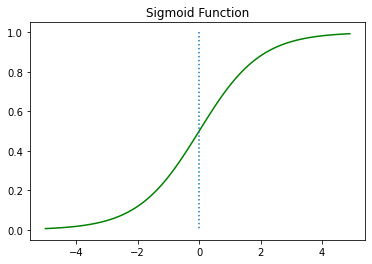

In [57]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [58]:
# Cost function : error function
# 로지스틱 회귀에서는 시그모이드 함수가 존재하기 때문에 backward 방식이 조금 변화
# 시그모이드 함수의 특징은 출력값이 0 과 1 사이의 값이라는 점이다. 
# https://wikidocs.net/57805 참조

#파이토치로 로지스틱 회귀 구현하기

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

hypothesis = 1/(1 + torch.exp(-(x_train.matmul(W) + b)))
print(hypothesis)
# <-> hypothesis = torch.sigmoid(x_train.matmul(W) + b)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [59]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [60]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [61]:
# 파이토치는 로지스틱 회긔의 비용함수를 이미 구현해서 제공
F.binary_coss_entropy(hypothesis, y_train)

AttributeError: module 'torch.nn.functional' has no attribute 'binary_coss_entropy'

In [64]:
# 클래스로 파이토치 - 로지스틱 회귀 구현하기

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))
    

model = BinaryClassifier()

# Optimizer 설정

optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    #H(x)
    hypothesis = model(x_train)
    
    #cost
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost 로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #20번 마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))




Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [65]:
# 원 - 핫 인코딩 : 각 경우마다 오차는 균등해야하기 때문에 사용하는 방식
# 원 - 핫 벡터를 이용해서 Loss function 을 구축해서 classification 을 진행
# 여기서부터는 Nulti - class Classification 예제

'''
1. 로지스틱 회귀 : 시그모이드 함수 이후 0과 1 사이의 값으로 만듬
2. 소프트맥스 회귀 : 총 합이 1이 되는 아이디어를 모든 클래스에 적용'''

import torch
import torch.nn.functional as F

torch.manual_seed(1)

z = torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z, dim = 0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [66]:
hypothesis.sum()

tensor(1.)

In [67]:
z = torch.rand(3, 5, requires_grad = True)
hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


In [68]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [69]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [70]:
print(y.unsqueeze(1))
# https://wikidocs.net/60572 
# ...ing 

tensor([[0],
        [2],
        [1]])
